### Linear Regression with possible modes of 'NE' (normal equation, exact solution), 'GD' (gradient descent) ,
### 'GDM' (GD with momentum), 'SGD' (stochastic GD), 'SGDM' (stochastic GD with momentum)

In [1]:
import numpy as np

In [58]:
class LinearRegression():
        
        #********************************************************************
        # INITIALIZING  
        #********************************************************************
        def __init__(self, mode = "NE", learn_rate = 0.01, nb_epochs = 1000, batch_size = 32, beta = 0.9, tolerance = 1e-4):
            if mode not in ["NE", "GD", "GDM", "SGD", "SGDM"]:
                raise ValueError(mode + " is not a valid choice.")
            self.mode = mode
            # parameters
            self.Theta = None
            # learning rate  
            self.learn_rate = learn_rate
            # number of max iterations 
            self.nb_epochs = nb_epochs
            # optimizing with momentum 
            self.beta = beta
            self.mo = None
            # the minimum value of norm(grad) for momentum optimization
            self.tolerance = tolerance
            # size of batch in SGD
            self.batch_size = batch_size
        
        
        #********************************************************************
        # FIT 
        #********************************************************************
        
        def fit(self, X, Y):
            X_1 = np.c_[np.ones(X.shape[0]), X]
            
            #----------------------------------------------------------------
            # The exact solution
            #----------------------------------------------------------------
            
            if self.mode == "NE":
                self.Theta = np.linalg.inv(X_1.T.dot(X_1)).dot(X_1.T.dot(Y))
                return True
            
            
            #----------------------------------------------------------------
            # Gradient Descent
            #----------------------------------------------------------------
            
            elif self.mode == "GD":
                if self.Theta is None:
                    self.Theta = np.zeros((X_1.shape[1], 1))
                grad = X_1.T.dot(X_1.dot(self.Theta) - Y)/X_1.shape[0]
                for i in range(self.nb_epochs):
                    # check that gradient is not too small value
                    if np.linalg.norm(grad) > self.tolerance:
                        self.Theta -= self.learn_rate*grad
                        grad = X_1.T.dot(X_1.dot(self.Theta) - Y)/X_1.shape[0]
                return True
            
            
            #----------------------------------------------------------------
            # Gradient Descent with Momentum
            #----------------------------------------------------------------
            
            elif self.mode == "GDM":
                if self.Theta is None:
                    self.Theta = np.zeros((X_1.shape[1], 1))
                    self.mo = np.zeros_like(self.Theta)
                grad = X_1.T.dot(X_1.dot(self.Theta) - Y)/X_1.shape[0]
                for i in range(self.nb_epochs):
                    # check that gradient is not too small value
                    if np.linalg.norm(grad) > self.tolerance:
                        # momentum optimization
                        self.mo = self.beta*self.mo + grad
                        self.Theta -= self.learn_rate*self.mo
                        grad = X_1.T.dot(X_1.dot(self.Theta) - Y)/X_1.shape[0]
                return True
            
            
            #----------------------------------------------------------------
            # Stochastic Gradient Descent
            #----------------------------------------------------------------
            
            elif self.mode == "SGD":                
                if self.Theta is None:
                    self.Theta = np.zeros((X_1.shape[1], 1))
                    
                # Calculating number of batches
                nb_X = X_1.shape[0]
                nb_batch = int(nb_X / self.batch_size)
            
                # If size of last batch is less that batch_size
                # then consider it as another batch anyway
                if nb_X % nb_batch != 0:
                    nb_batch += 1
                 
                for i in range(self.nb_epochs):
                    # returns permuted range 
                    permuted_nb_batch = np.random.permutation(nb_batch)
                
                    for batch in range(nb_batch):
                        # we run through the list of permuted batches
                        # len(permuted_nb_batch) = nb_batch
                        j = permuted_nb_batch[batch]                    
                        x_batch = X_1[j*self.batch_size:(j+1)*self.batch_size,:]
                        y_batch = Y[j*self.batch_size:(j+1)*self.batch_size,:]
                                        
                        grad = (x_batch.T.dot(x_batch.dot(self.Theta) - y_batch)) / x_batch.shape[0]                        
                        self.Theta -= self.learn_rate*grad
                return True
            
            
            #----------------------------------------------------------------
            # Stochastic Gradient Descent with momentum
            #----------------------------------------------------------------
            
            elif self.mode == "SGDM":                
                if self.Theta is None:
                    self.Theta = np.zeros((X_1.shape[1], 1))
                    self.mo = np.zeros_like(self.Theta)
                    
                # Calculating number of batches
                nb_X = X_1.shape[0]
                nb_batch = int(nb_X / self.batch_size)
            
                # If size of last batch is less that batch_size
                # then consider it as another batch anyway
                if nb_X % nb_batch != 0:
                    nb_batch += 1
                 
                for i in range(self.nb_epochs):
                    # returns permuted range 
                    permuted_nb_batch = np.random.permutation(nb_batch)
                
                    for batch in range(nb_batch):
                        # we run through the list of permuted batches
                        # len(permuted_nb_batch) = nb_batch
                        j = permuted_nb_batch[batch]                    
                        x_batch = X_1[j*self.batch_size:(j+1)*self.batch_size,:]
                        y_batch = Y[j*self.batch_size:(j+1)*self.batch_size,:]
                                        
                        grad = (x_batch.T.dot(x_batch.dot(self.Theta) - y_batch)) / x_batch.shape[0]
                        # momentum optimization
                        self.mo = self.beta*self.mo + grad
                        self.Theta -= self.learn_rate*self.mo
                return True
               
        
        #********************************************************************
        # PREDICT 
        #********************************************************************                
            
        def predict(self, X):
            if self.Theta is None:
                return False
            else:
                X_1 = np.c_[np.ones(X.shape[0]), X]
                return X_1.dot(self.Theta)

### Examples

### Simple data set

In [59]:
import matplotlib.pyplot as plt

In [60]:
x_ = np.array(10 * np.random.rand(50))
y_ = 2 * x_ - 5 + np.random.randn(50)
x = x_.reshape(50, 1)
y = y_.reshape(50, 1)
print(x.shape, y.shape)

(50, 1) (50, 1)


In [61]:
simple_modelNE = LinearRegression(mode="NE")
simple_modelNE.fit(x, y)
y_predNE = simple_modelNE.predict(x)
simple_modelNE.Theta

array([[-4.94262635],
       [ 2.01164319]])

In [62]:
simple_modelGD = LinearRegression(mode="GD", nb_epochs=1000)
simple_modelGD.fit(x, y)
y_predGD = simple_modelGD.predict(x)
simple_modelGD.Theta

array([[-4.46352501],
       [ 1.94481543]])

In [63]:
simple_modelGDM = LinearRegression(mode="GDM", nb_epochs=100)
simple_modelGDM.fit(x, y)
y_predGDM = simple_modelGDM.predict(x)
simple_modelGDM.Theta

array([[-4.65965577],
       [ 1.97869531]])

In [72]:
simple_modelSGD = LinearRegression(mode="SGD", nb_epochs=2000)
simple_modelSGD.fit(x, y)
y_predSGD = simple_modelSGD.predict(x)
simple_modelSGD.Theta

array([[-4.43340892],
       [ 1.93239913]])

In [75]:
simple_modelSGDM = LinearRegression(mode="SGDM", nb_epochs=150)
simple_modelSGDM.fit(x, y)
y_predSGDM = simple_modelSGDM.predict(x)
simple_modelSGDM.Theta

array([[-4.43013071],
       [ 1.93240852]])

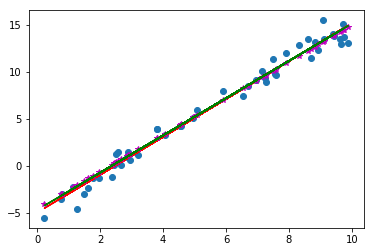

In [76]:
plt.scatter(x, y)
plt.plot(x, y_predNE, "r-")
plt.plot(x, y_predGD, "m*")
plt.plot(x, y_predGDM, "g-")

### Data set with more features

In [77]:
%%time
X = np.random.rand(500, 10)
X_1 = np.c_[np.ones(X.shape[0]), X]
Theta_1 = np.array([[-5,10,2,7,4.5,0.1,0.01,-1,1,3,0]])
Err = np.random.normal(0, 0.1, size=(X_1.shape[0], 1)) 
Y = X_1.dot(Theta_1.T) + Err

Wall time: 0 ns


In [78]:
%%time
modelNE = LinearRegression(mode="NE")
modelNE.fit(X, Y)
for i in range(modelNE.Theta.shape[0]):
    print(modelNE.Theta[i], '-->', Theta_1.T[i])

[-5.04240642] --> [-5.]
[ 9.99975198] --> [ 10.]
[ 2.01122267] --> [ 2.]
[ 7.01011145] --> [ 7.]
[ 4.54099677] --> [ 4.5]
[ 0.08029301] --> [ 0.1]
[ 0.02355196] --> [ 0.01]
[-1.00408603] --> [-1.]
[ 1.00492569] --> [ 1.]
[ 3.0444742] --> [ 3.]
[-0.0242385] --> [ 0.]
Wall time: 10 ms


In [83]:
%%time
modelGD = LinearRegression(mode="GD", nb_epochs=20000)
modelGD.fit(X, Y)
for i in range(modelGD.Theta.shape[0]):
    print(modelGD.Theta[i], '-->', Theta_1.T[i])

[-4.93145372] --> [-5.]
[ 9.98609764] --> [ 10.]
[ 1.98896776] --> [ 2.]
[ 6.99246429] --> [ 7.]
[ 4.51527334] --> [ 4.5]
[ 0.05557188] --> [ 0.1]
[ 0.00237696] --> [ 0.01]
[-1.03191733] --> [-1.]
[ 0.9858269] --> [ 1.]
[ 3.02098167] --> [ 3.]
[-0.04510464] --> [ 0.]
Wall time: 810 ms


In [84]:
%%time
modelGDM = LinearRegression(mode="GDM", nb_epochs=2000)
modelGDM.fit(X, Y)
for i in range(modelGDM.Theta.shape[0]):
    print(modelGDM.Theta[i], '-->', Theta_1.T[i])

[-4.93829394] --> [-5.]
[ 9.98693958] --> [ 10.]
[ 1.99033954] --> [ 2.]
[ 6.99355277] --> [ 7.]
[ 4.51685964] --> [ 4.5]
[ 0.05709516] --> [ 0.1]
[ 0.00368249] --> [ 0.01]
[-1.03020187] --> [-1.]
[ 0.98700401] --> [ 1.]
[ 3.02243093] --> [ 3.]
[-0.04381882] --> [ 0.]
Wall time: 130 ms


In [85]:
%%time
modelSGD = LinearRegression(mode="SGD", nb_epochs=1500)
modelSGD.fit(X, Y)
for i in range(modelSGD.Theta.shape[0]):
    print(modelSGD.Theta[i], '-->', Theta_1.T[i])

[-4.99184612] --> [-5.]
[ 9.99114998] --> [ 10.]
[ 2.00126997] --> [ 2.]
[ 7.00044488] --> [ 7.]
[ 4.52983349] --> [ 4.5]
[ 0.06658814] --> [ 0.1]
[ 0.01512861] --> [ 0.01]
[-1.01796314] --> [-1.]
[ 0.99814128] --> [ 1.]
[ 3.03576961] --> [ 3.]
[-0.03250531] --> [ 0.]
Wall time: 630 ms


In [91]:
%%time
modelSGDM = LinearRegression(mode="SGDM", nb_epochs=150)
modelSGDM.fit(X, Y)
for i in range(modelSGDM.Theta.shape[0]):
    print(modelSGDM.Theta[i], '-->', Theta_1.T[i])

[-4.99521321] --> [-5.]
[ 9.99180338] --> [ 10.]
[ 2.00124641] --> [ 2.]
[ 7.00091013] --> [ 7.]
[ 4.53108807] --> [ 4.5]
[ 0.06727334] --> [ 0.1]
[ 0.01570909] --> [ 0.01]
[-1.01762562] --> [-1.]
[ 0.99957718] --> [ 1.]
[ 3.03672533] --> [ 3.]
[-0.03184378] --> [ 0.]
Wall time: 110 ms
